# Simple gradient descent example

In [1]:
def quadratic_function(x):
    return x ** 2 - 2 * x + 30

print(0, quadratic_function(0))

0 30


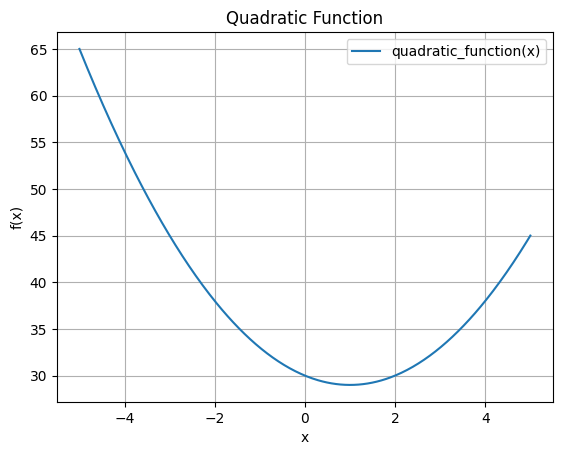

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data for plotting
x_vals = np.linspace(-5, 5, 400)
y_vals = quadratic_function(x_vals)

# Plot the function
plt.plot(x_vals, y_vals, label='quadratic_function(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Quadratic Function')
plt.legend()
plt.grid(True)
plt.show()

Starting x: -5.99890661239624
Iteration 1: x = -4.599125385284424, f(x) = 77.98469543457031
Iteration 2: x = -3.4793002605438232, f(x) = 60.35020446777344
Iteration 3: x = -2.583440065383911, f(x) = 49.06413269042969
Iteration 4: x = -1.866752028465271, f(x) = 41.841041564941406
Iteration 5: x = -1.2934015989303589, f(x) = 37.21826934814453
Iteration 6: x = -0.8347212076187134, f(x) = 34.25968933105469
Iteration 7: x = -0.46777695417404175, f(x) = 32.36620330810547
Iteration 8: x = -0.17422154545783997, f(x) = 31.154369354248047
Iteration 9: x = 0.060622766613960266, f(x) = 30.378795623779297
Iteration 10: x = 0.24849821627140045, f(x) = 29.882429122924805
Iteration 11: x = 0.3987985849380493, f(x) = 29.564754486083984
Iteration 12: x = 0.5190388560295105, f(x) = 29.36144256591797
Iteration 13: x = 0.6152310967445374, f(x) = 29.2313232421875
Iteration 14: x = 0.6921848654747009, f(x) = 29.148046493530273
Iteration 15: x = 0.7537478804588318, f(x) = 29.094749450683594
Iteration 16: x = 

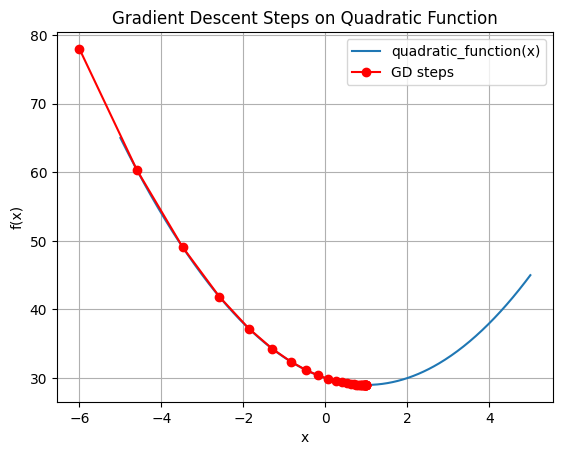

In [4]:
import torch
import random
import numpy as np
import matplotlib.pyplot as plt

x = torch.tensor([random.uniform(-10, 10)], requires_grad=True)
print("Starting x:", x.item())

xs = []
ys = []

for i in range(30):
    y = quadratic_function(x)
    y.backward()
    with torch.no_grad():
        xs.append(x.item())
        ys.append(y.item() if hasattr(y, "item") else float(y))
        x -= 0.1 * x.grad
    x.grad.zero_()
    print(f"Iteration {i + 1}: x = {x.item()}, f(x) = {y.item()}")
print(f"Optimized x: {x.item()}")

# Append final point
xs.append(x.item())
ys.append(quadratic_function(x.item()))

# Plot the function and gradient descent steps
x_vals = np.linspace(-5, 5, 400)
y_vals = quadratic_function(x_vals)
plt.figure()
plt.plot(x_vals, y_vals, label='quadratic_function(x)')
plt.plot(xs, ys, 'o-', color='red', label='GD steps')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent Steps on Quadratic Function')
plt.legend()
plt.grid(True)
plt.show()